<a href="https://colab.research.google.com/github/apoorva14-unique/Data_science_with_python.ipynb/blob/main/Task_4_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset successfully loaded
First 5 rows of the dataset:
   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34        1.523278           14.648277   

           Price  
0  602134.816747

<ipython-input-26-03633b01115a>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Square_Feet'].fillna(data['Square_Feet'].median(), inplace=True)
<ipython-input-26-03633b01115a>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

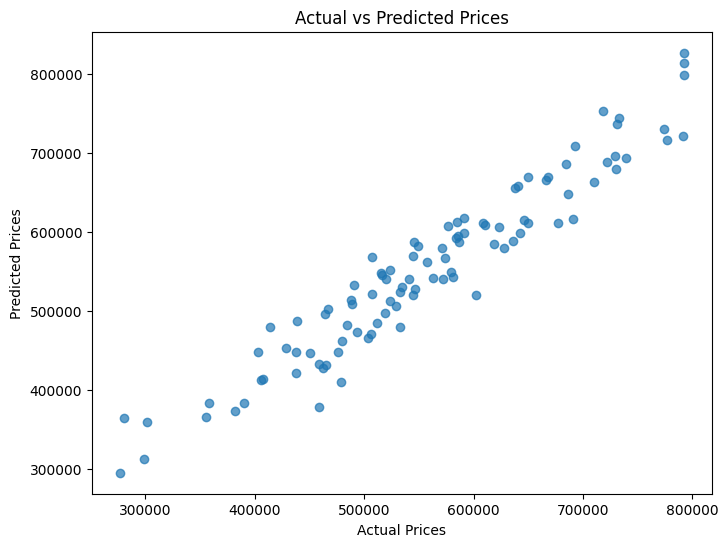

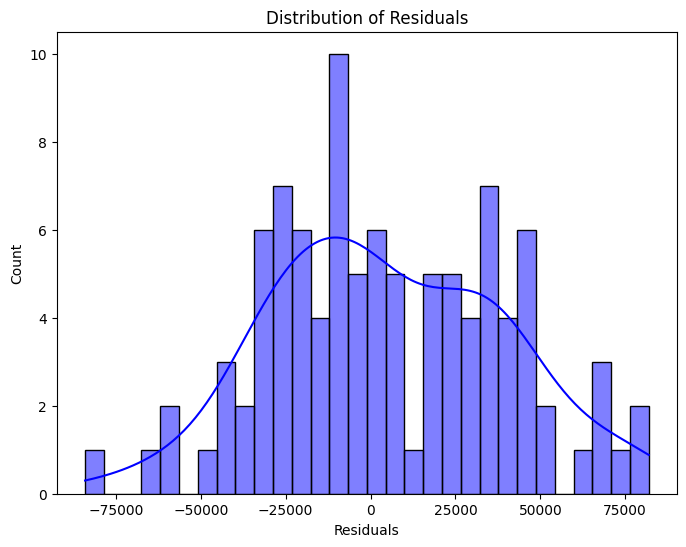

In [26]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#load the dataset
#assume 'house_prices.csv" is in the current directory
data = pd.read_csv('house_price.csv')
print("Dataset successfully loaded")
print("First 5 rows of the dataset:");
print(data.head())

#dataset info
print("\nDataset Information:")
print(data.info())

#check for missing values
print("\nMissing values:")
print(data.isnull().sum())

#Filling missing values(ex: median for numerical columns)
data['Square_Feet'].fillna(data['Square_Feet'].median(), inplace=True)
data['Num_Floors'].fillna(data['Num_Floors'].median(), inplace=True)

#Handle outliers(example: capping)
upper_limit = data['Price'].quantile(0.95)
data['Price'] = np.where(data['Price'] > upper_limit, upper_limit, data['Price'])

#Encoding the 'location score' column using one-hot encoding
data = pd.get_dummies(data, columns=['Location_Score'], drop_first=True)
print("Dataset after encoding:")
print(data.head())

from sklearn.preprocessing import MinMaxScaler

#normalize numerical columns
scaler = MinMaxScaler()
data[['Square_Feet', 'Num_Floors']] = scaler.fit_transform(data[['Square_Feet', 'Num_Floors']])

#define features and target variable
X= data.drop('Price', axis=1)
y = data['Price']

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

#initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

#display coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

#make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

#Scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

#Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()
